In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np

In [6]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400, facecolor='white')

In [7]:
def plot_smearing_dependence(T, r_max, path, image_path, image_name):
    df_data = pd.read_csv(path, index_col=None)
    
    df_data = df_data[df_data['T'] == T]
    df_data = df_data[df_data['r/a'] <= r_max]
    # df_data = df_data[df_data['smearing_step'].isin(smearing_steps)]
    fg = seaborn.FacetGrid(data=df_data, hue='smearing_step',  height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

    save_image(image_path, image_name, fg)

In [8]:
def make_plots(common_path, additional_parameters, T, r_max):
    print('original')
    plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/potential_original.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_original_T={T}')
    print('monopole')
    plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}', f'potential_smearing_monopole_T={T}')
    print('monopoless')
    plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_monopoless.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}', f'potential_smearing_monopoless_T={T}')
    print('abelian')
    plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/potential_abelian.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_abelian_T={T}')
    print('offdiagonal')
    plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_offdiagonal.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}', f'potential_smearing_offdiagonal_T={T}')
    print('photon')
    plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_photon.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}', f'potential_smearing_photon_T={T}')
    

original


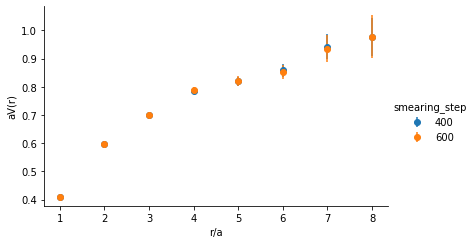

monopole


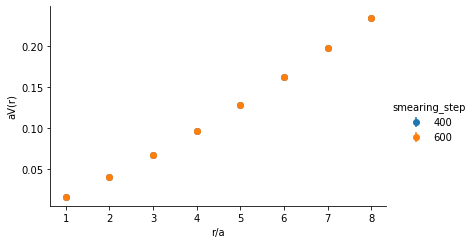

monopoless


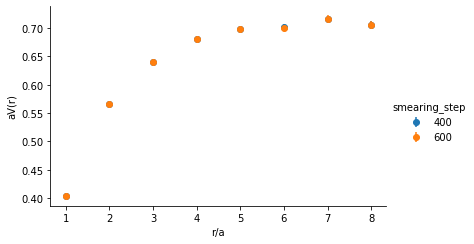

abelian


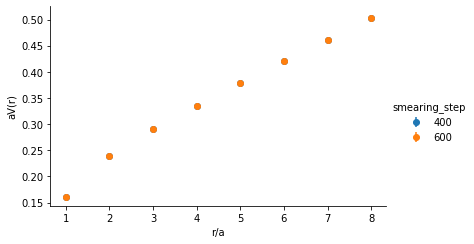

offdiagonal


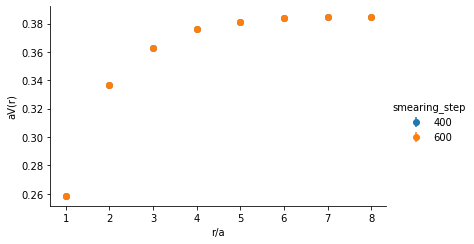

photon


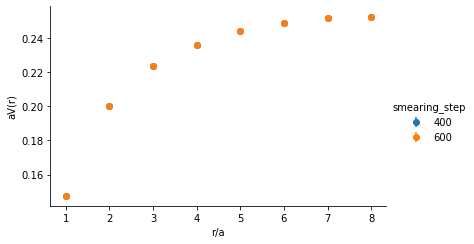

In [31]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
r_max = 8
make_plots(common_path, 'compensate_1', T, r_max)

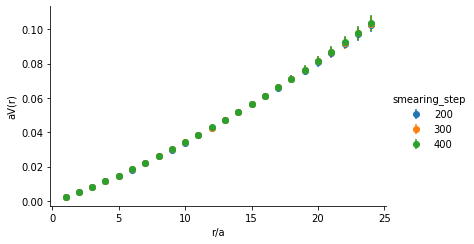

In [12]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4'
T = 20
smearing_steps = [200, 300, 400]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

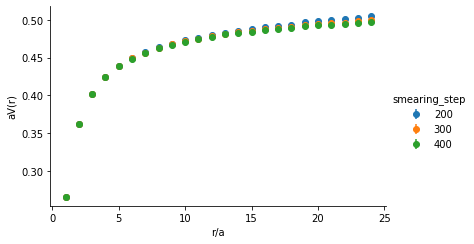

In [11]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4'
T = 6
smearing_steps = [200, 300, 400]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopoless.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopoless_T={T}')

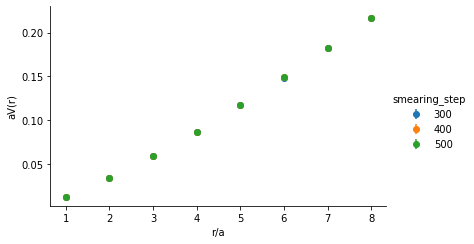

In [15]:
common_path = 'su3/gluodynamics/16^4/beta6.1/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T = 5
smearing_steps = [300, 400, 500]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

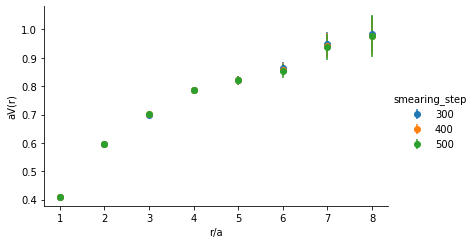

In [4]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
smearing_steps = [300, 400, 500]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_original.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_original_T={T}')

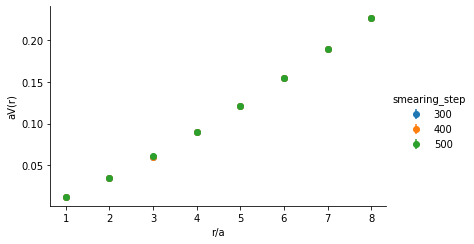

In [16]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
smearing_steps = [300, 400, 500]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

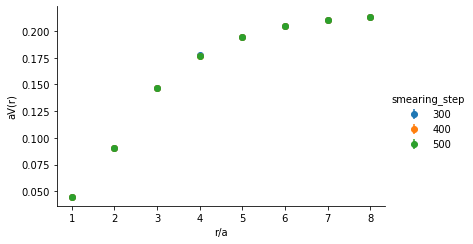

In [17]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
smearing_steps = [300, 400, 500]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopoless.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopoless_T={T}')

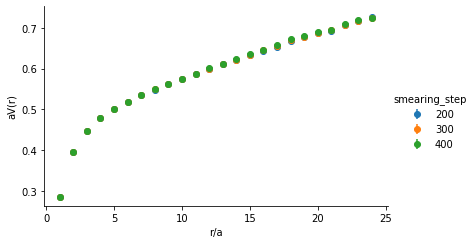

In [12]:
common_path = 'su2/su2_suzuki/48^4/beta2.7/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
smearing_steps = [200, 300, 400]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_original.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_original_T={T}')

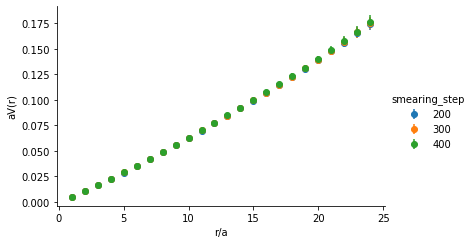

In [21]:
common_path = 'su2/su2_suzuki/48^4/beta2.7/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.5/OR_steps=4'
T = 16
smearing_steps = [200, 300, 400]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

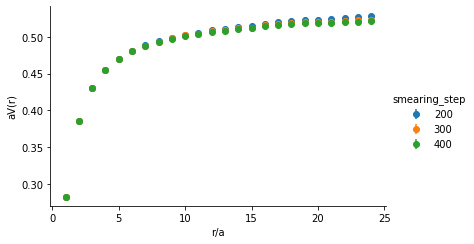

In [14]:
common_path = 'su2/su2_suzuki/48^4/beta2.7/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.5/OR_steps=4'
T = 6
smearing_steps = [200, 300, 400]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopoless.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopoless_T={T}')

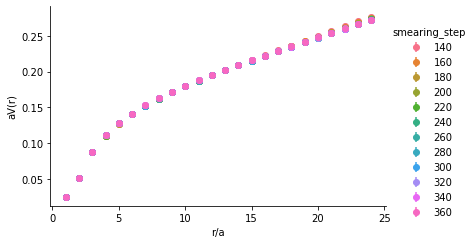

In [7]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
r_max = 24
plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/potential_original.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_original_T={T}')

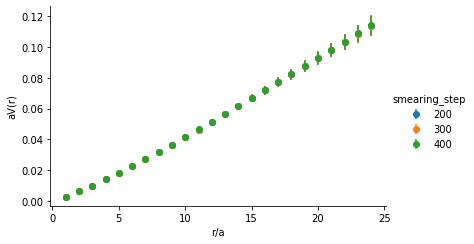

In [6]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/T_final=0.5/OR_steps=4'
T = 20
smearing_steps = [300, 400]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

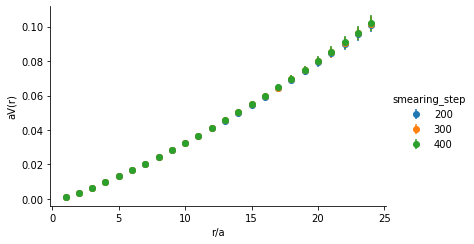

In [9]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP1_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4'
T = 20
r_max = 24
plot_smearing_dependence(T, r_max, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

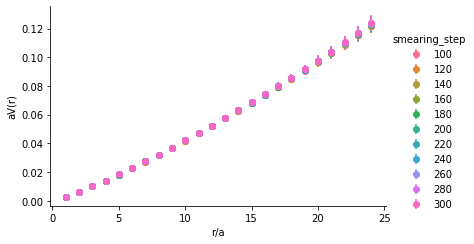

In [7]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.0005/OR_steps=4'
T = 20
smearing_steps = [200, 300]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

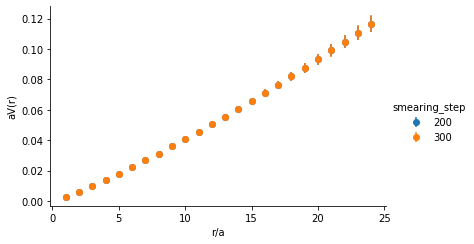

In [17]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.001/T_final=0.5/OR_steps=4'
T = 20
smearing_steps = [200, 300]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

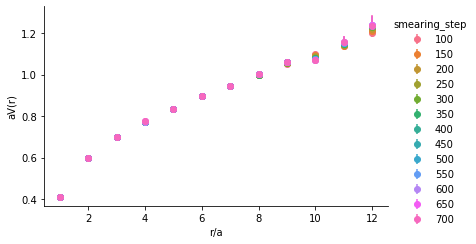

In [5]:
common_path = 'su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T = 6
smearing_steps = [100, 200, 400, 700]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_original.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_su3_T={T}')

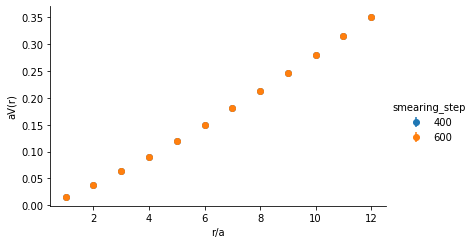

In [11]:
common_path = 'su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3'
T = 6
smearing_steps = [400, 600]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

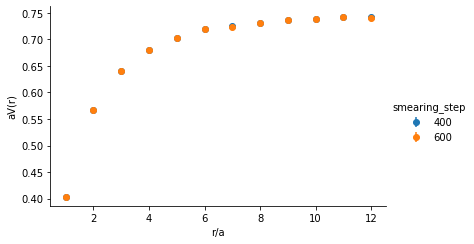

In [12]:
common_path = 'su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3'
T = 6
smearing_steps = [400, 600]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopoless.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopoless_T={T}')

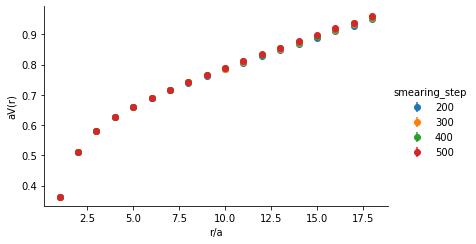

In [5]:
common_path = 'su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T = 5
smearing_steps = [200, 300, 400, 500]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_original.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_su3_T={T}')

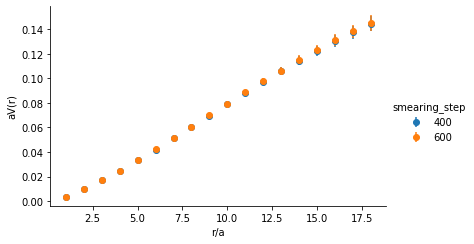

In [13]:
common_path = 'su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3'
T = 6
smearing_steps = [400, 600]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopole.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopole_T={T}')

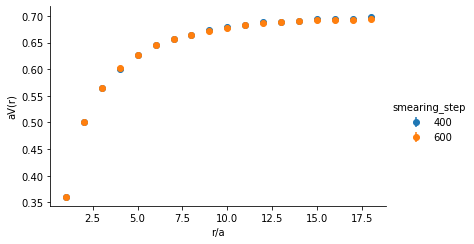

In [14]:
common_path = 'su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3'
T = 8
smearing_steps = [400, 600]
plot_smearing_dependence(T, smearing_steps, f'../../result/smearing/potential/{common_path}/potential_monopoless.csv', 
                        f'../../images/potential/smearing/smearing_dependence/{common_path}', f'potential_smearing_monopoless_T={T}')

In [11]:
def plot_time_dependence(path, space_size, T_max, image_path, image_name):
    df_data = pd.read_csv(path, index_col=None)
    
    # df_data = df_data[df_data['smearing_step'].isin(smearing_steps)]
    df_data = df_data[df_data['r/a'] == space_size]
    df_data = df_data[df_data['T'] <= T_max]
    fg = seaborn.FacetGrid(data=df_data, hue='smearing_step',  height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'T', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

    save_image(image_path, image_name, fg)

In [12]:
def make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters):
    print('original')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/smearing/potential/{common_path}/potential_original.csv'
        image_path = f'../../images/potential/smearing/smearing_dependence/{common_path}'
        image_name = f'potential_time_original_r={r}'
        plot_time_dependence(path, r, T_max_arr[0], image_path, image_name)
    print('monopole')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_monopole.csv'
        image_path = f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_monopole_r={r}'
        plot_time_dependence(path, r, T_max_arr[1], image_path, image_name)
    print('monopoless')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_monopoless.csv'
        image_path = f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_monopoless_r={r}'
        plot_time_dependence(path, r, T_max_arr[2], image_path, image_name)
    print('abelian')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/smearing/potential/{common_path}/potential_abelian.csv'
        image_path = f'../../images/potential/smearing/smearing_dependence/{common_path}'
        image_name = f'potential_time_abelian_r={r}'
        plot_time_dependence(path, r, T_max_arr[3], image_path, image_name)
    print('offdiagonal')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_offdiagonal.csv'
        image_path = f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_offdiagonal_r={r}'
        plot_time_dependence(path, r, T_max_arr[4], image_path, image_name)
    print('photon')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/smearing/potential/{common_path}/{additional_parameters}/potential_photon.csv'
        image_path = f'../../images/potential/smearing/smearing_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_photon_r={r}'
        plot_time_dependence(path, r, T_max_arr[5], image_path, image_name)

original
r = 2


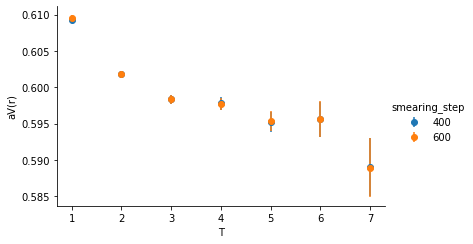

r = 6


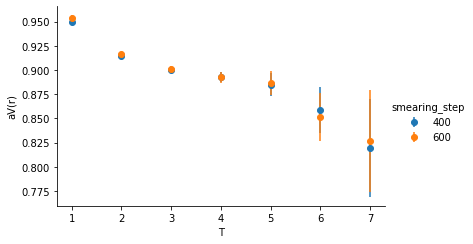

r = 8


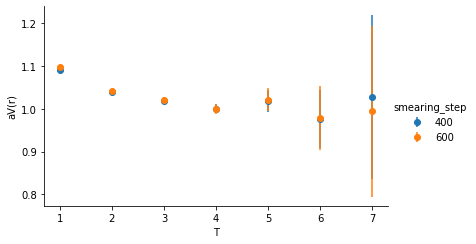

r = 12


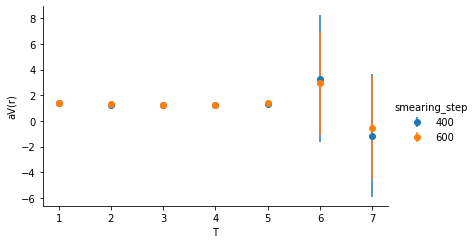

r = 16


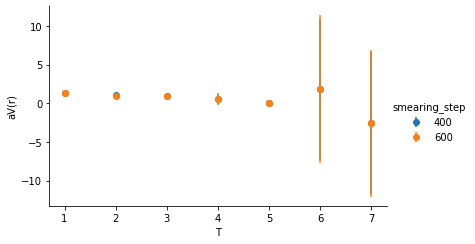

monopole
r = 2


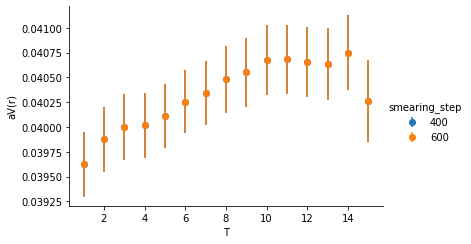

r = 6


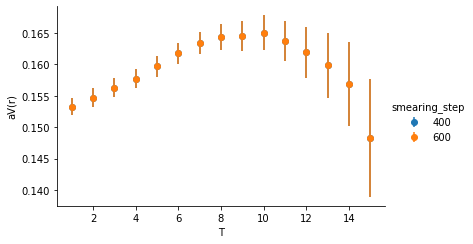

r = 8


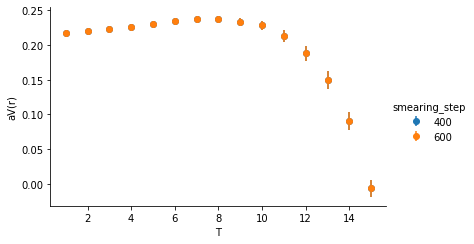

r = 12


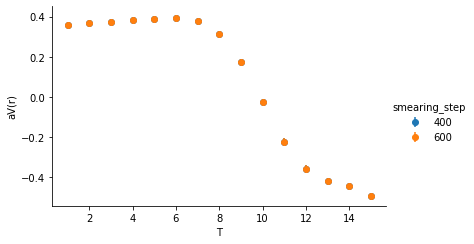

r = 16


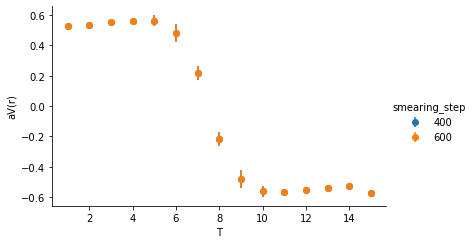

monopoless
r = 2


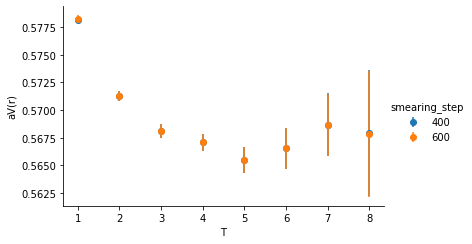

r = 6


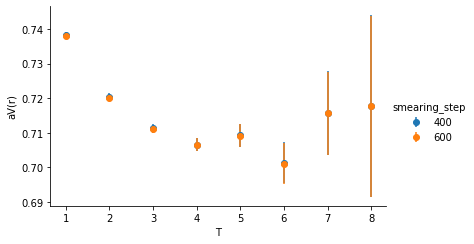

r = 8


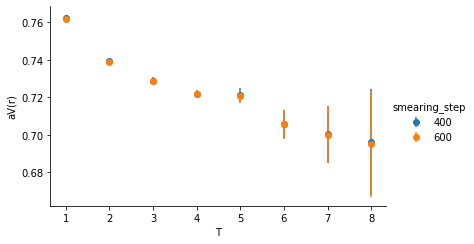

r = 12


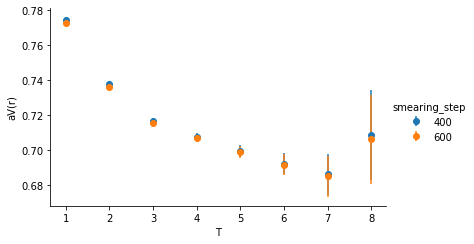

r = 16


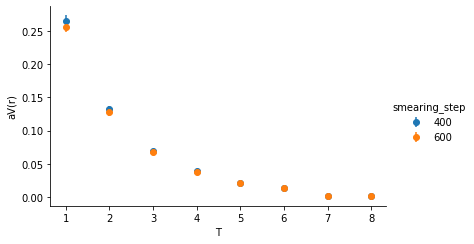

abelian
r = 2


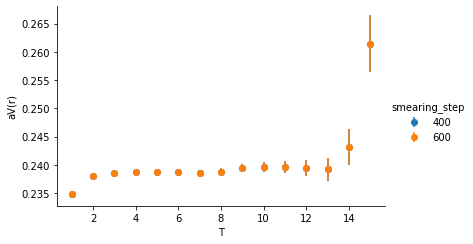

r = 6


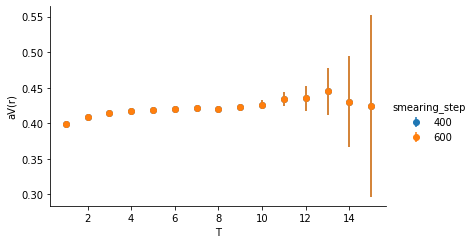

r = 8


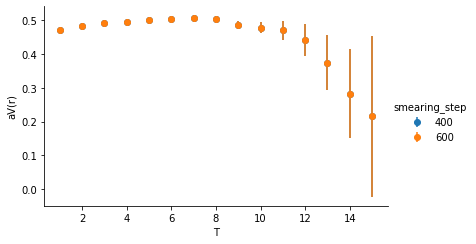

r = 12


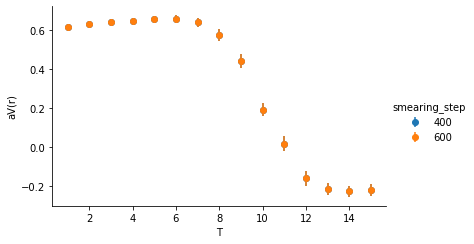

r = 16


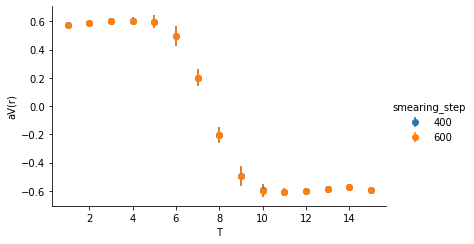

offdiagonal
r = 2


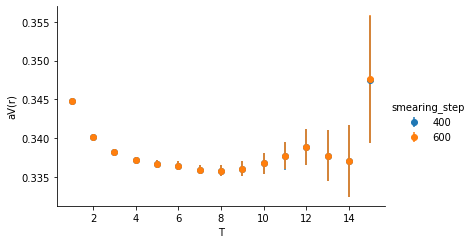

r = 6


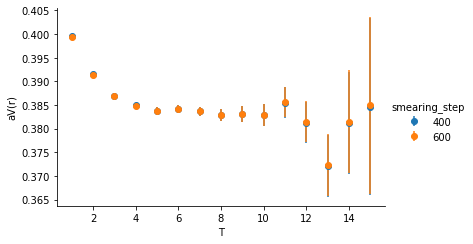

r = 8


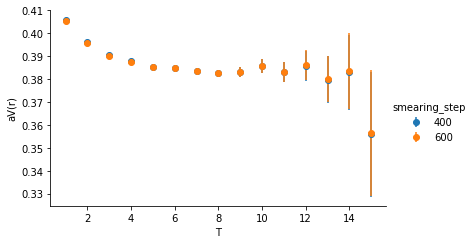

r = 12


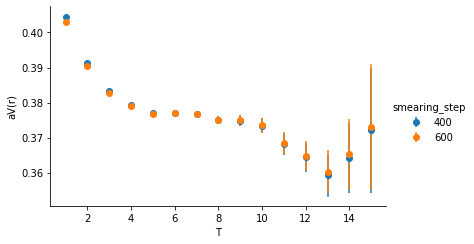

r = 16


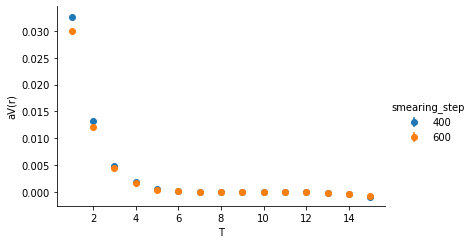

photon
r = 2


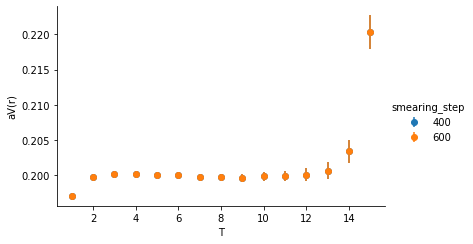

r = 6


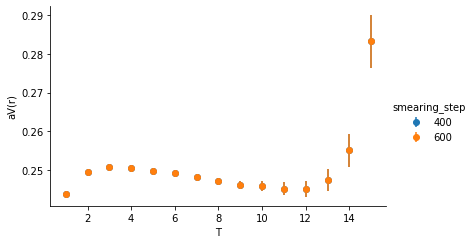

r = 8


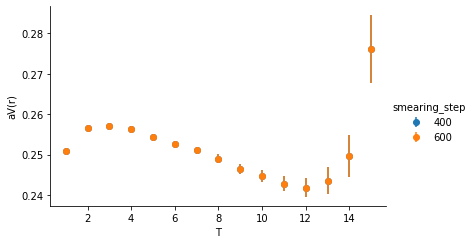

r = 12


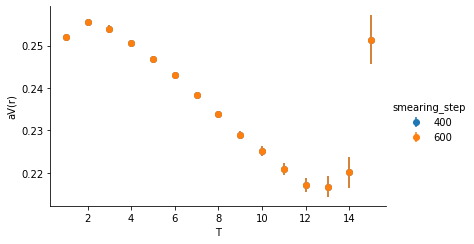

r = 16


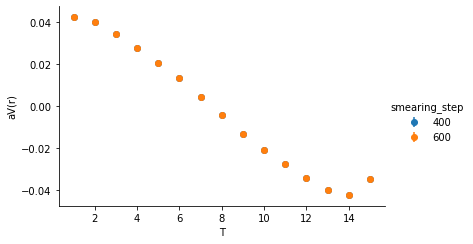

In [13]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [7, 16, 8, 16, 16, 16]
space_sizes = [2, 6, 8, 12, 16]
additional_parameters = 'compensate_1'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters)

original
r = 2


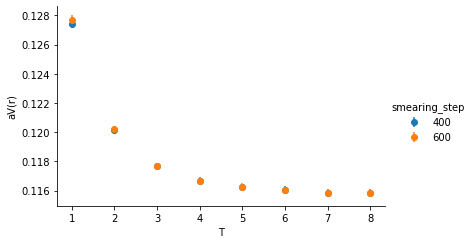

r = 6


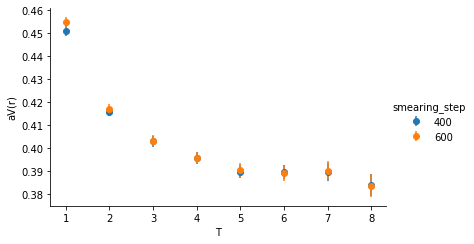

r = 8


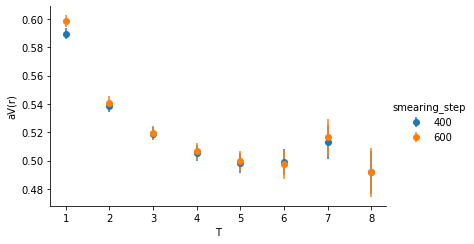

r = 12


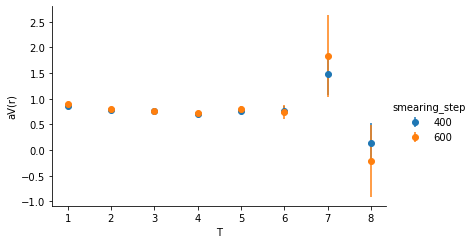

r = 16


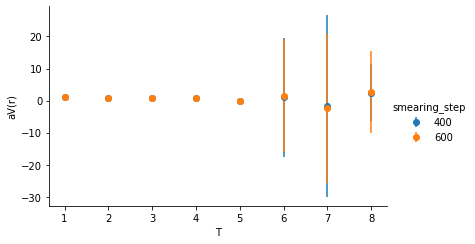

monopole
r = 2


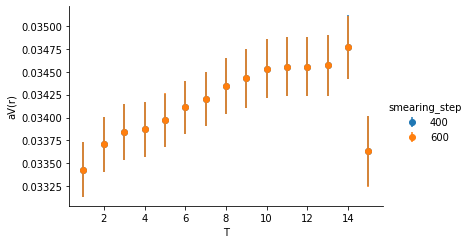

r = 6


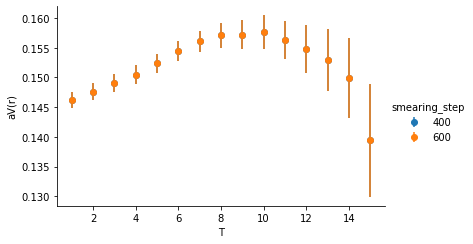

r = 8


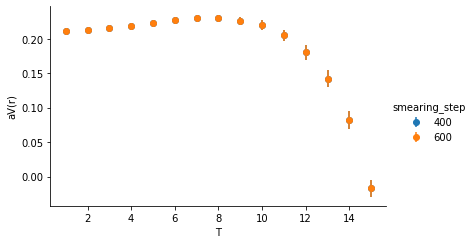

r = 12


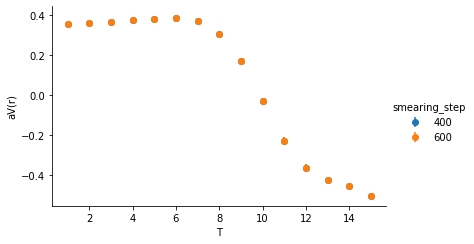

r = 16


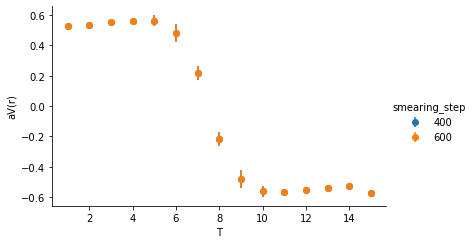

monopoless
r = 2


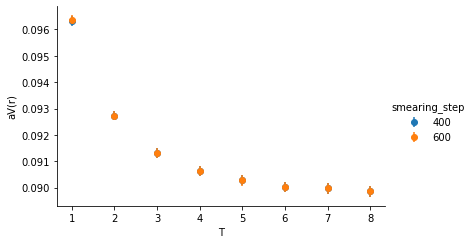

r = 6


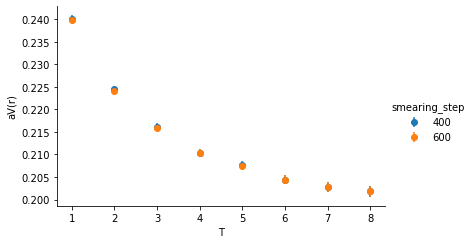

r = 8


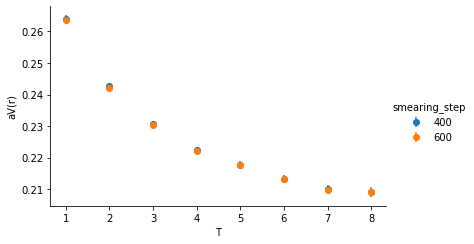

r = 12


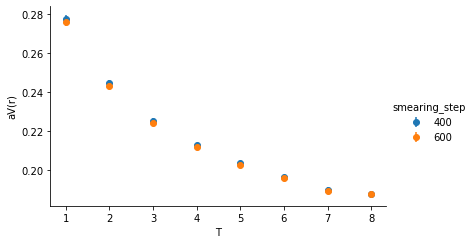

r = 16


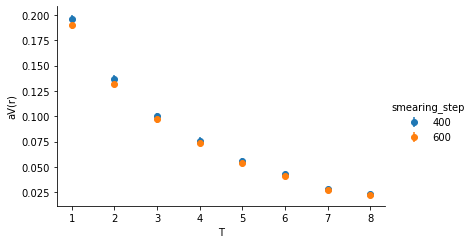

abelian
r = 2


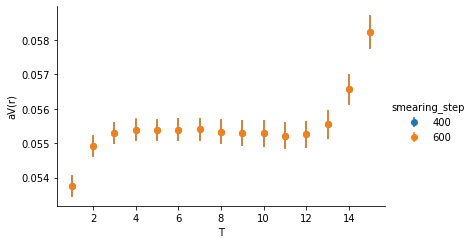

r = 6


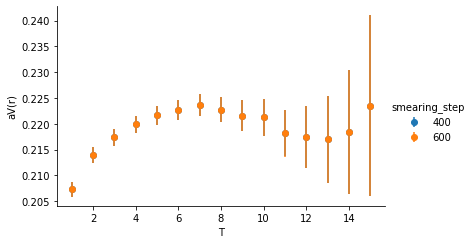

r = 8


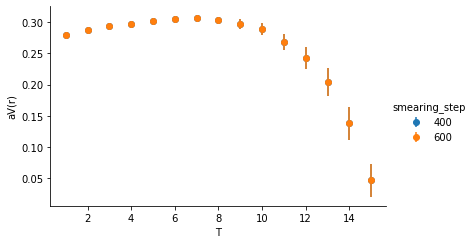

r = 12


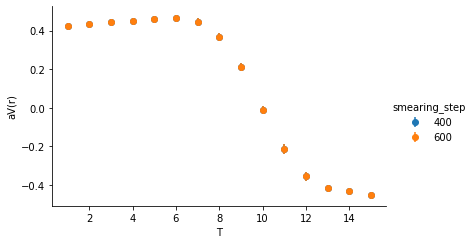

r = 16


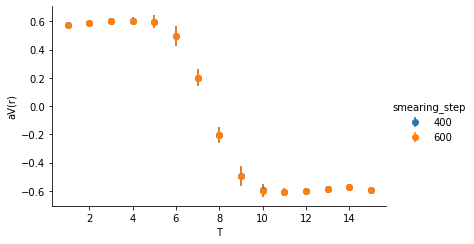

offdiagonal
r = 2


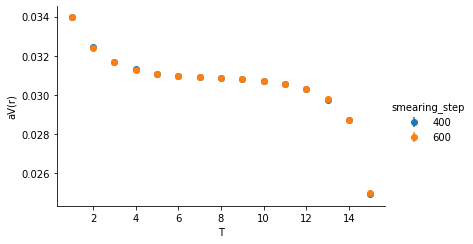

r = 6


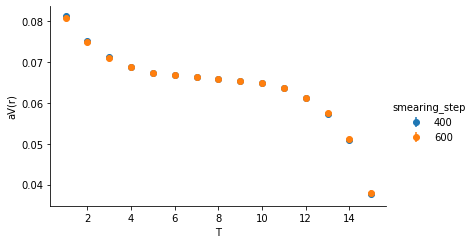

r = 8


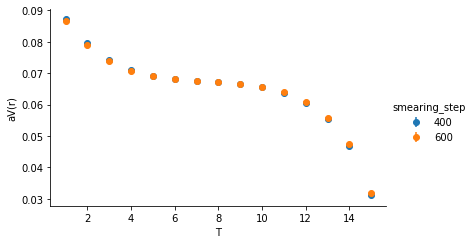

r = 12


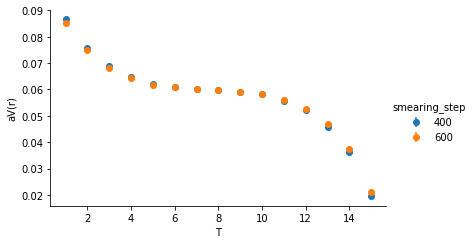

r = 16


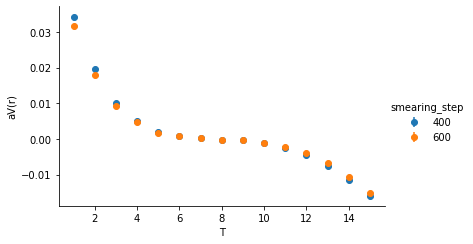

photon
r = 2


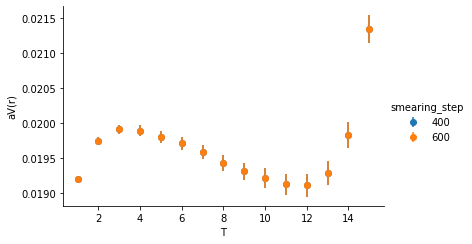

r = 6


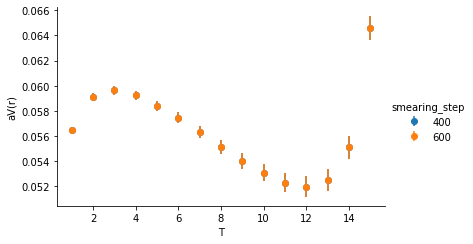

r = 8


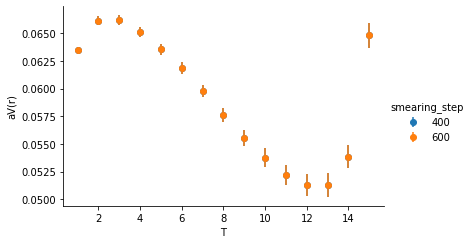

r = 12


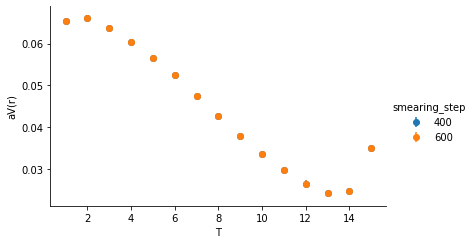

r = 16


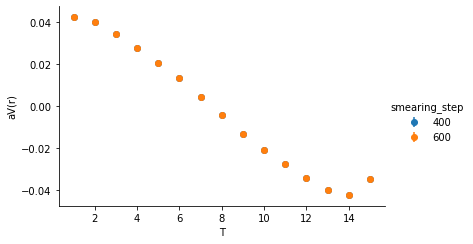

In [11]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [8, 16, 8, 16, 16, 16]
space_sizes = [2, 6, 8, 12, 16]
additional_parameters = 'compensate_1'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters)

original
r = 2


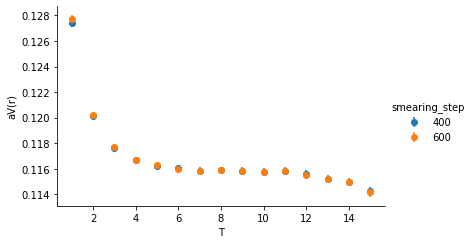

r = 6


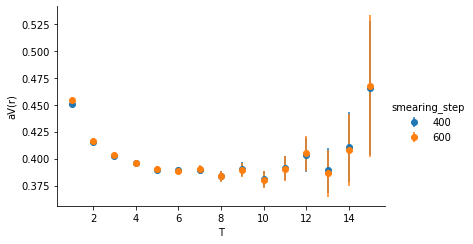

r = 8


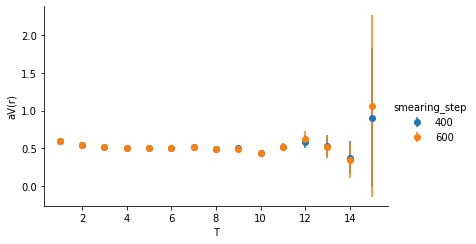

r = 12


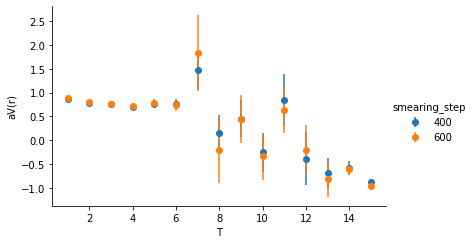

r = 16


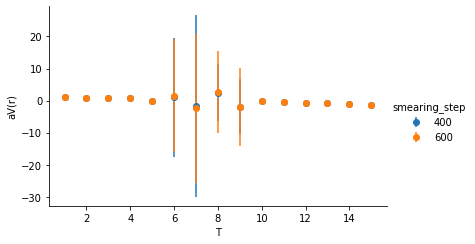

monopole
r = 2


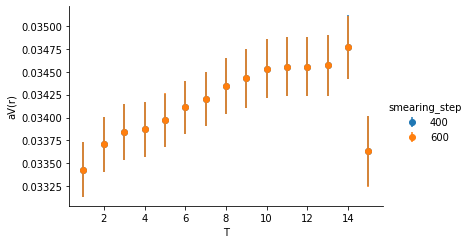

r = 6


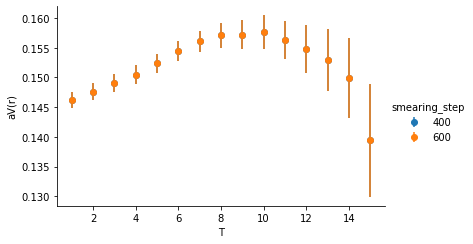

r = 8


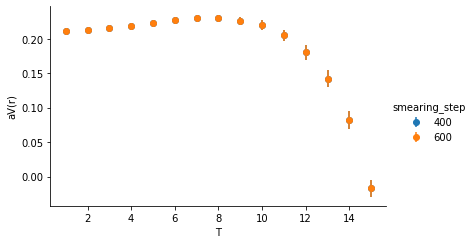

r = 12


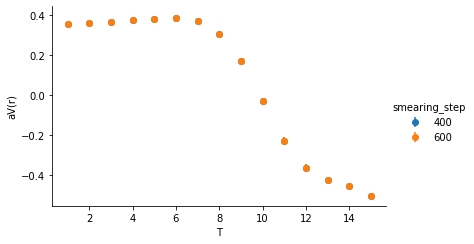

r = 16


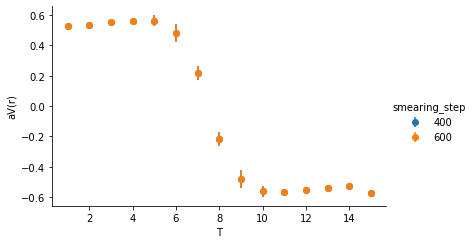

monopoless
r = 2


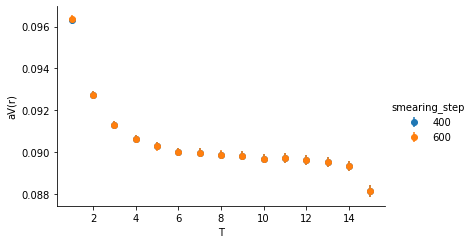

r = 6


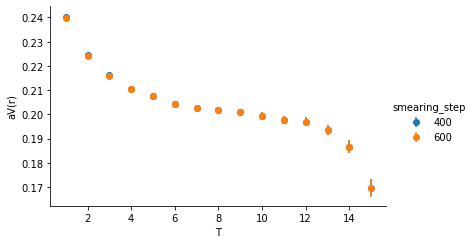

r = 8


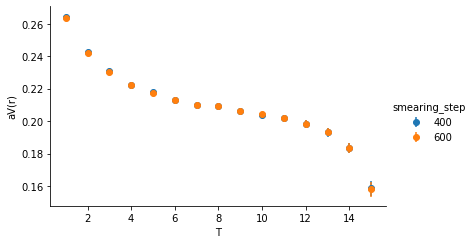

r = 12


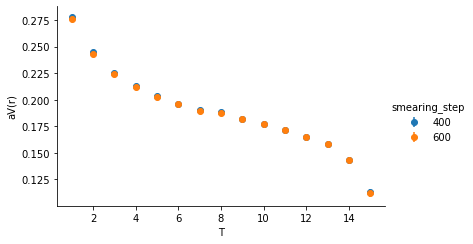

r = 16


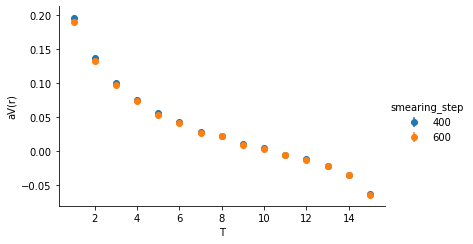

abelian
r = 2


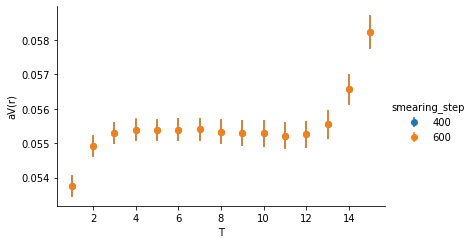

r = 6


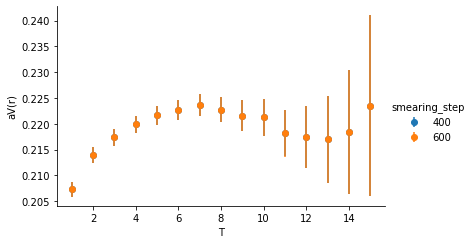

r = 8


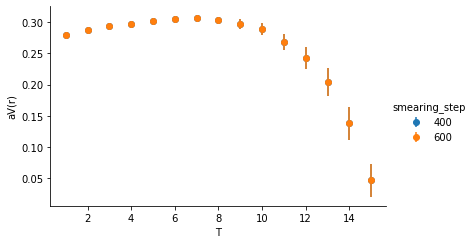

r = 12


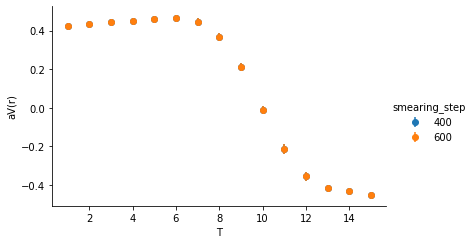

r = 16


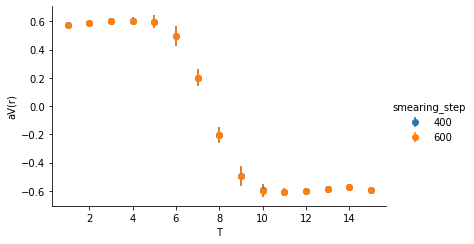

offdiagonal
r = 2


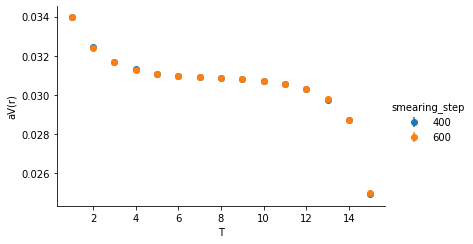

r = 6


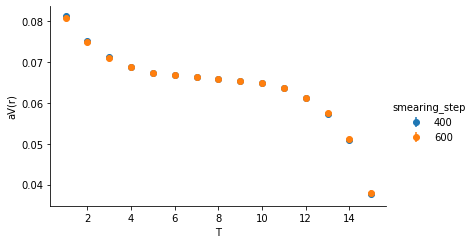

r = 8


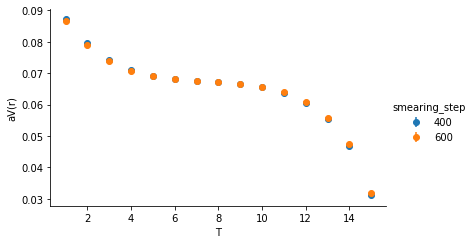

r = 12


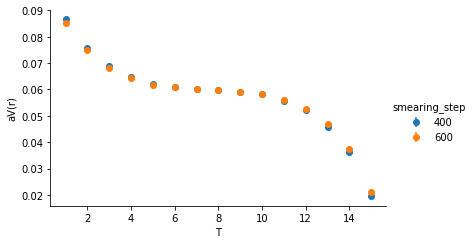

r = 16


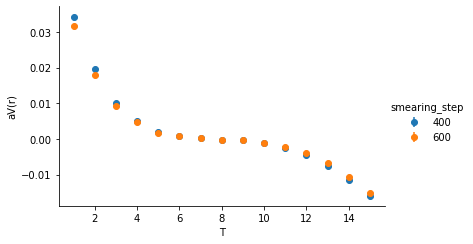

photon
r = 2


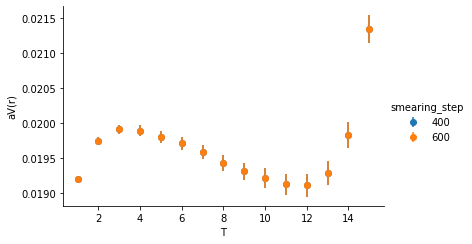

r = 6


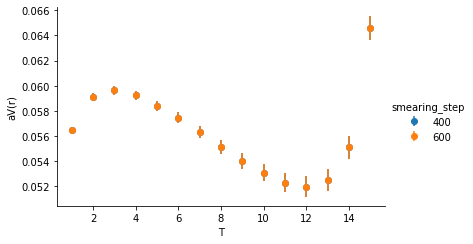

r = 8


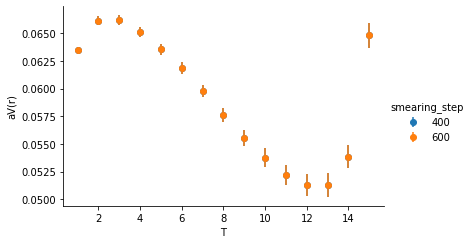

r = 12


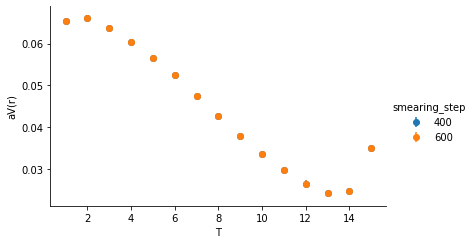

r = 16


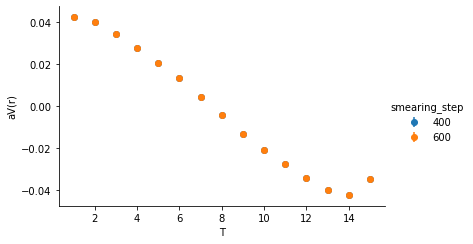

In [58]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T_max = 16
space_sizes = [2, 6, 8, 12, 16]
additional_parameters = 'compensate_1'
make_plot_T(common_path, T_max, space_sizes, additional_parameters)

original
r = 2


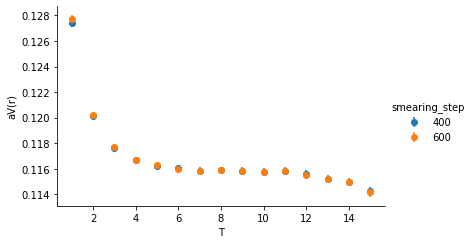

r = 6


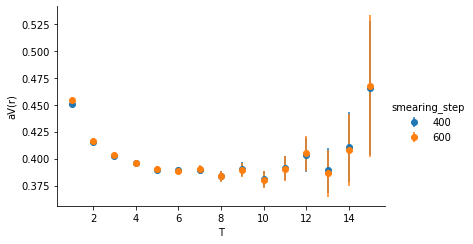

r = 8


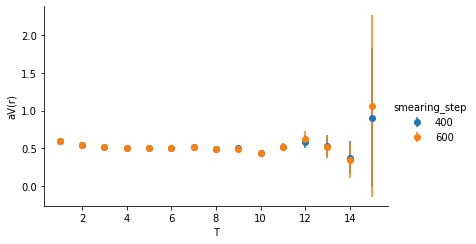

r = 12


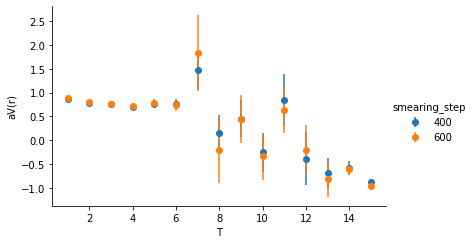

r = 16


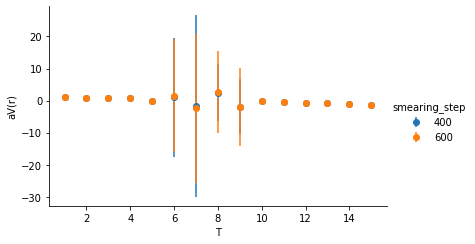

monopole
r = 2


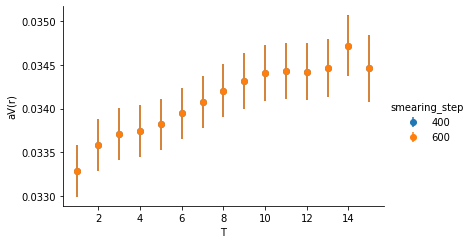

r = 6


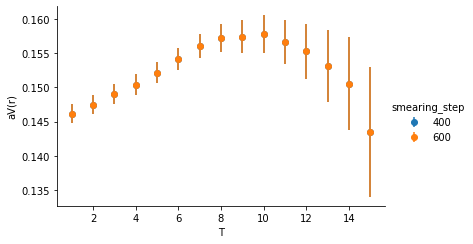

r = 8


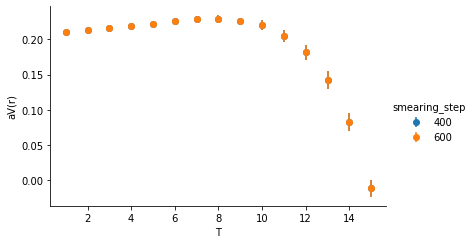

r = 12


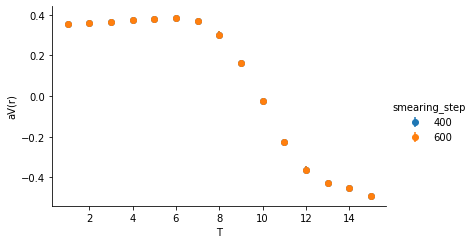

r = 16


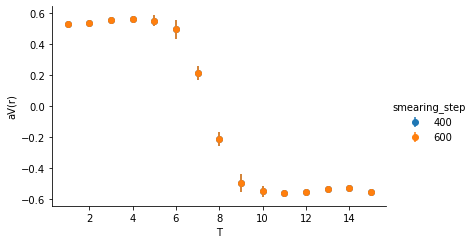

monopoless
r = 2


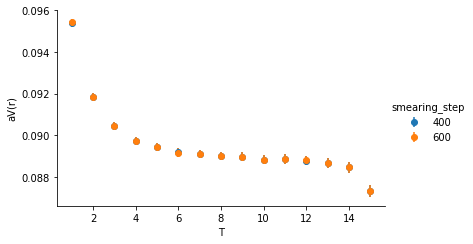

r = 6


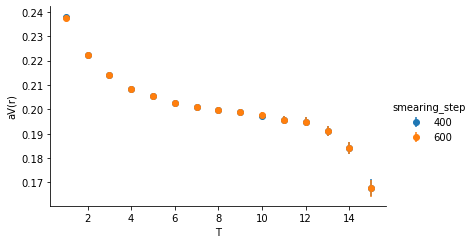

r = 8


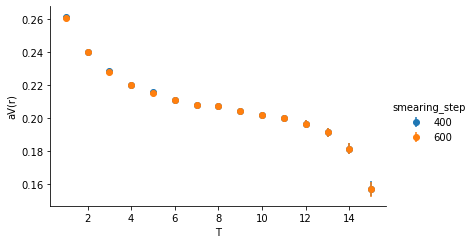

r = 12


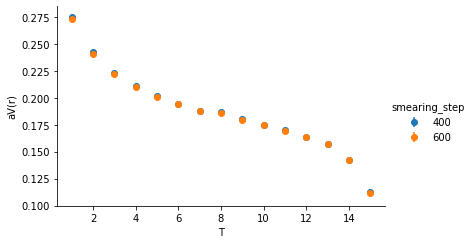

r = 16


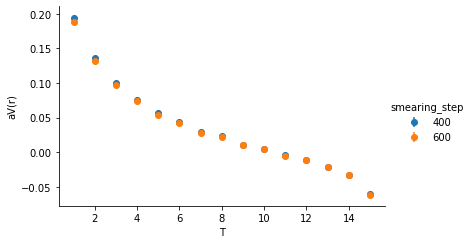

abelian
r = 2


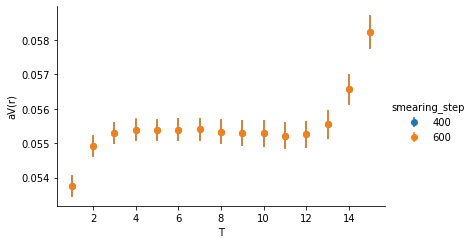

r = 6


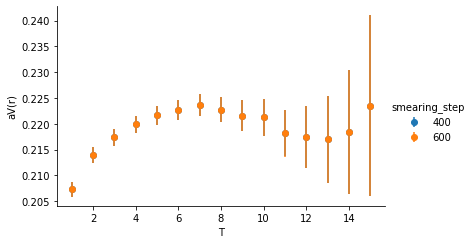

r = 8


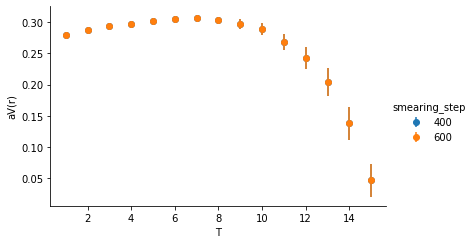

r = 12


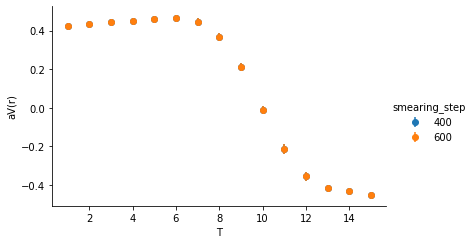

r = 16


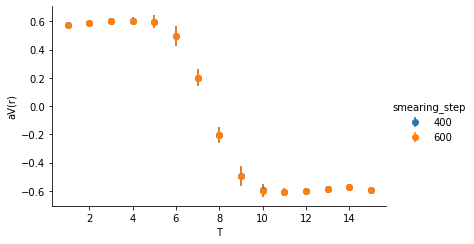

offdiagonal
r = 2


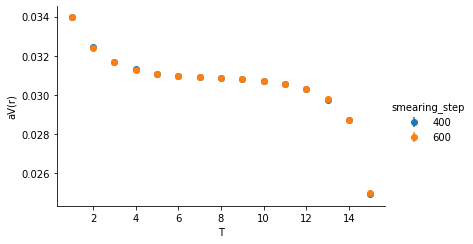

r = 6


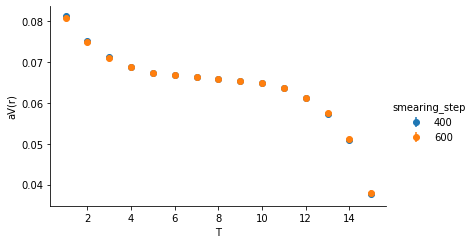

r = 8


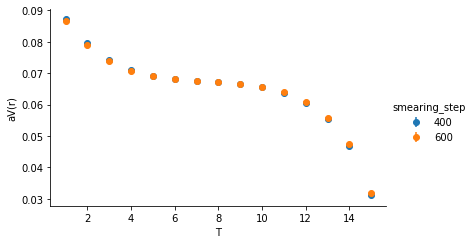

r = 12


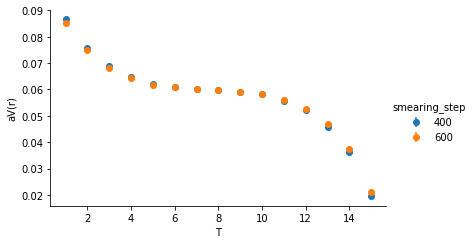

r = 16


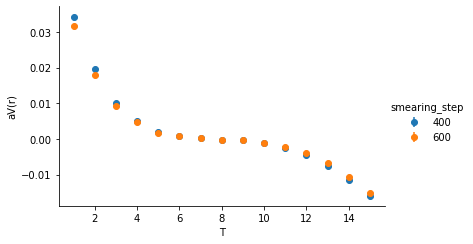

photon
r = 2


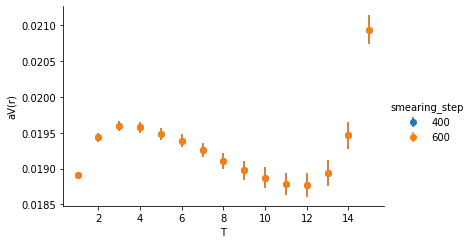

r = 6


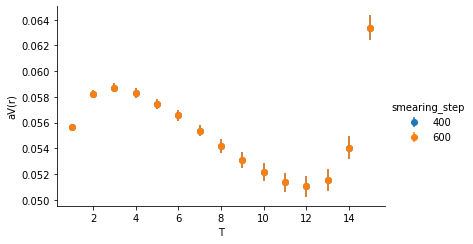

r = 8


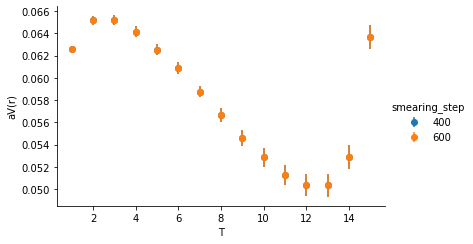

r = 12


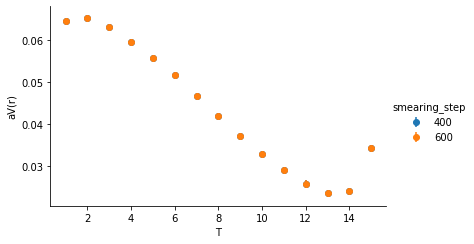

r = 16


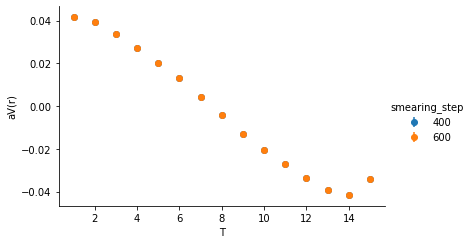

In [59]:
common_path = 'su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T_max = 16
space_sizes = [2, 6, 8, 12, 16]
additional_parameters = 'compensate_0'
make_plot_T(common_path, T_max, space_sizes, additional_parameters)

In [5]:
def plot_time_dependence_params(paths, space_size, T_max, image_path, image_name):
    data = []
    for path in paths:
        data.append(pd.read_csv(path, index_col=None))
        data[-1] = data[-1][data[-1]['smearing_step'] == paths[path][1]]
        data[-1]['smearing'] = paths[path][0]

    df_data = pd.concat(data)
    
    df_data = df_data[df_data['r/a'] == space_size]
    df_data = df_data[df_data['T'] <= T_max]
    fg = seaborn.FacetGrid(data=df_data, hue='smearing',  height=3.5, aspect=2)
    fg.map(plt.errorbar, 'T', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()

    save_image(image_path, image_name, fg)

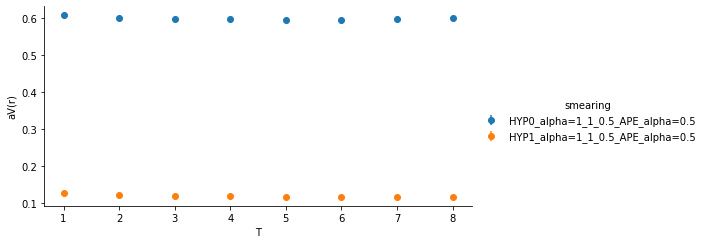

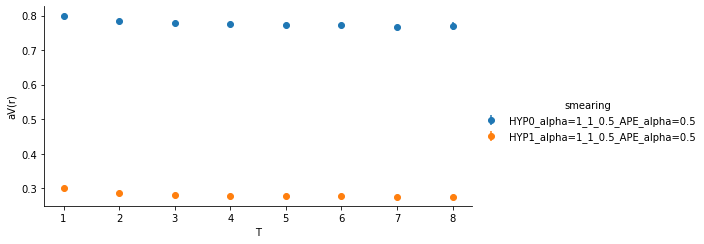

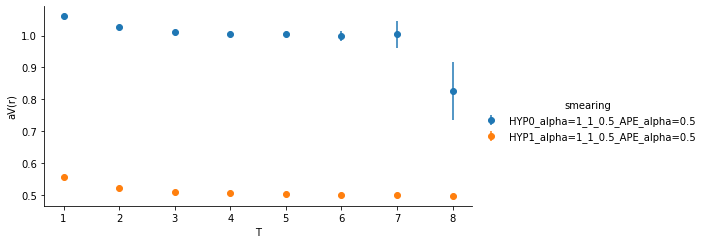

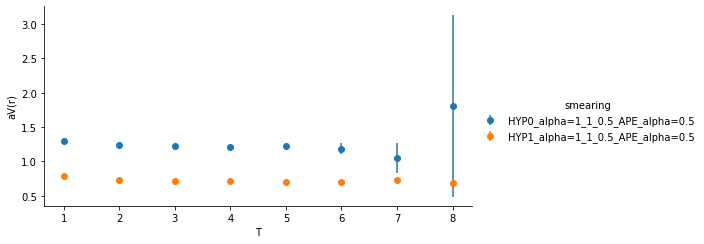

In [81]:
path = f'../../result/smearing/potential'
T_max = 8
space_sizes = [2, 4, 8, 12]
params = 'su3/gluodynamics/24^4/beta6.0'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv': ('HYP0_alpha=1_1_0.5_APE_alpha=0.5', 160),
        f'{path}/{params}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv': ('HYP1_alpha=1_1_0.5_APE_alpha=0.5', 140)}
for r in space_sizes:
    image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
    image_name = f'potential_HYP_original_r={r}'
    plot_time_dependence_params(paths, r, T_max, image_path, image_name)

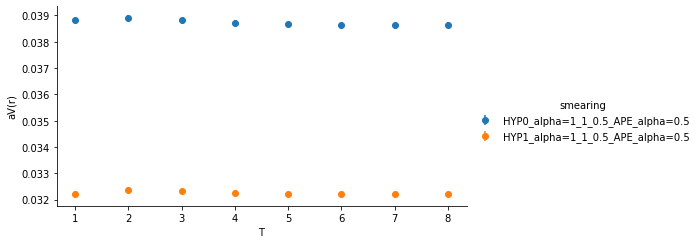

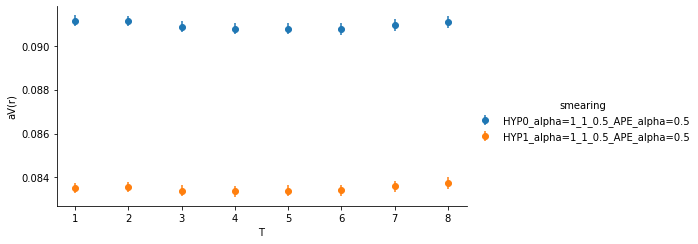

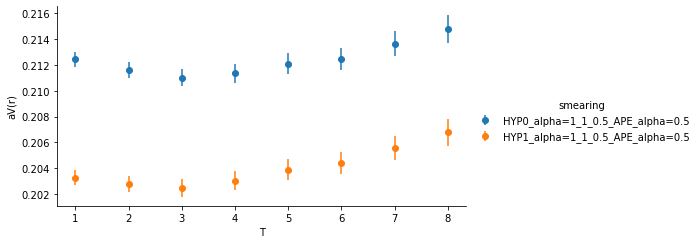

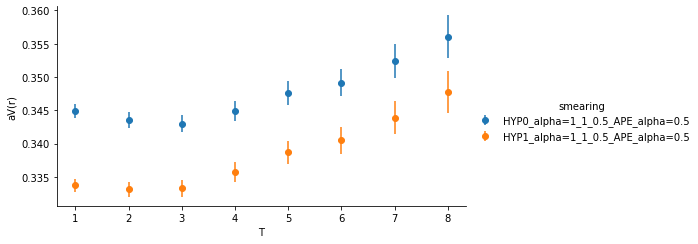

In [84]:
path = f'../../result/smearing/potential'
T_max = 8
space_sizes = [2, 4, 8, 12]
params = 'su3/gluodynamics/24^4/beta6.0'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopole.csv': ('HYP0_alpha=1_1_0.5_APE_alpha=0.5', 160),
        f'{path}/{params}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopole.csv': ('HYP1_alpha=1_1_0.5_APE_alpha=0.5', 140)}
for r in space_sizes:
    image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
    image_name = f'potential_HYP_monopole_r={r}'
    plot_time_dependence_params(paths, r, T_max, image_path, image_name)

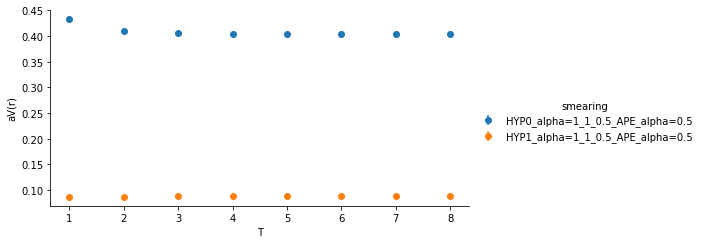

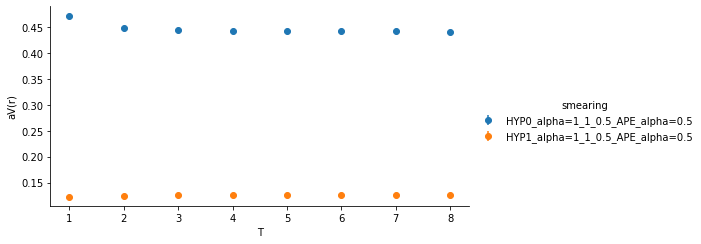

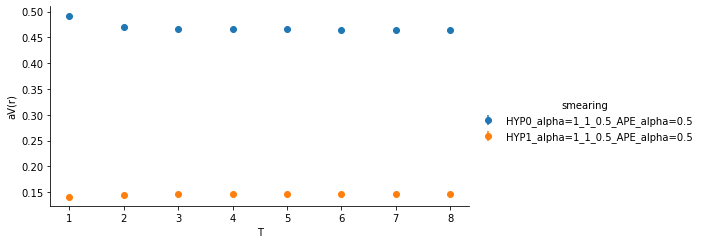

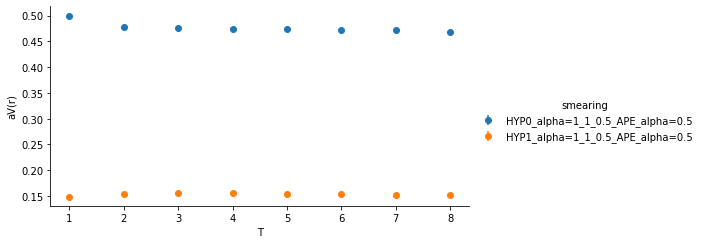

In [86]:
path = f'../../result/smearing/potential'
T_max = 8
space_sizes = [2, 4, 8, 12]
params = 'su3/gluodynamics/24^4/beta6.0'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopoless.csv': ('HYP0_alpha=1_1_0.5_APE_alpha=0.5', 240),
        f'{path}/{params}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopoless.csv': ('HYP1_alpha=1_1_0.5_APE_alpha=0.5', 240)}
for r in space_sizes:
    image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
    image_name = f'potential_HYP_monopoless_r={r}'
    plot_time_dependence_params(paths, r, T_max, image_path, image_name)

In [6]:
def plot_time_dependence_params_r(paths, space_size, T, image_path, image_name):
    data = []
    for path in paths:
        data.append(pd.read_csv(path, index_col=None))
        data[-1] = data[-1][data[-1]['smearing_step'] == paths[path][1]]
        data[-1]['smearing'] = paths[path][0]

    df_data = pd.concat(data)
    
    # df_data = df_data[df_data['r/a'] == space_size]
    df_data = df_data[df_data['T'] == T]
    fg = seaborn.FacetGrid(data=df_data, hue='smearing',  height=3.5, aspect=2)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()

    save_image(image_path, image_name, fg)

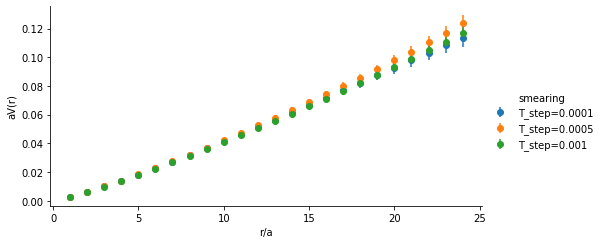

In [20]:
path = f'../../result/smearing/potential'
T = 20
params = 'su2/su2_suzuki/48^4/beta2.8'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/T_final=0.5/OR_steps=4/potential_monopole.csv': ('T_step=0.0001', 300),
        f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.0005/OR_steps=4/potential_monopole.csv': ('T_step=0.0005', 300),
        f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.001/T_final=0.5/OR_steps=4/potential_monopole.csv': ('T_step=0.001', 300)}
    
image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
image_name = f'potential_HYP_original_r={r}'
plot_time_dependence_params_r(paths, r, T, image_path, image_name)

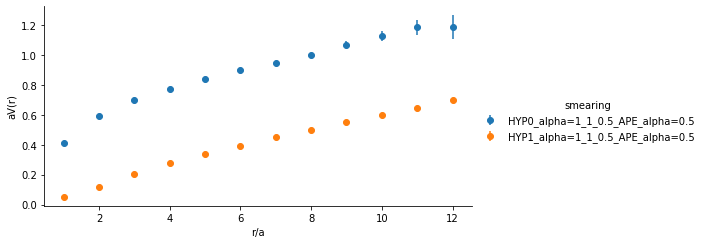

In [120]:
path = f'../../result/smearing/potential'
T = 6
params = 'su3/gluodynamics/24^4/beta6.0'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv': ('HYP0_alpha=1_1_0.5_APE_alpha=0.5', 160),
        f'{path}/{params}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv': ('HYP1_alpha=1_1_0.5_APE_alpha=0.5', 140)}
    
image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
image_name = f'potential_HYP_original_r={r}'
plot_time_dependence_params_r(paths, r, T, image_path, image_name)

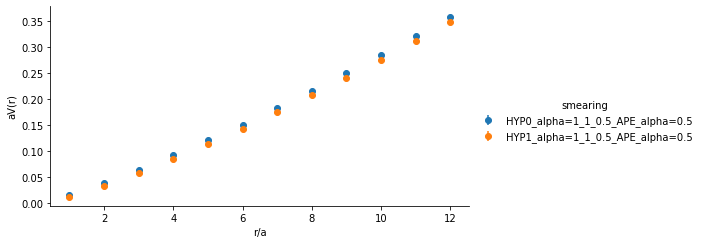

In [121]:
path = f'../../result/smearing/potential'
T = 8
params = 'su3/gluodynamics/24^4/beta6.0'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopole.csv': ('HYP0_alpha=1_1_0.5_APE_alpha=0.5', 400),
        f'{path}/{params}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopole.csv': ('HYP1_alpha=1_1_0.5_APE_alpha=0.5', 160)}

image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
image_name = f'potential_HYP_monopole_r={r}'
plot_time_dependence_params_r(paths, r, T, image_path, image_name)

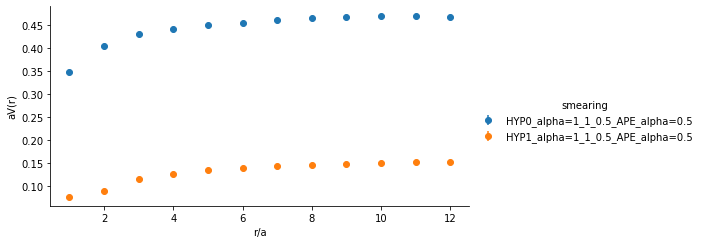

In [122]:
path = f'../../result/smearing/potential'
T = 8
space_sizes = [2, 4, 8, 12]
params = 'su3/gluodynamics/24^4/beta6.0'
paths = {f'{path}/{params}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopoless.csv': ('HYP0_alpha=1_1_0.5_APE_alpha=0.5', 240),
        f'{path}/{params}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/DP_steps_500/copies=3/potential_monopoless.csv': ('HYP1_alpha=1_1_0.5_APE_alpha=0.5', 240)}
    
image_path = f'../../images/potential/smearing/smearing_dependence/{params}'
image_name = f'potential_HYP_monopoless_r={r}'
plot_time_dependence_params_r(paths, r, T, image_path, image_name)